In [ ]:
pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38617 sha256=f4a7aad32602be57c73640acd181598e4cee2dda8d41c3d46109b1eff24a00a1
  Stored in directory: /root/.cache/pip/wheels/cc/6b/dd/7ff776de4ebf7b144bb9562a813be59d0108306f368af9b637
Successfully built yahoofinancials


In [ ]:
pip install plotly

In [ ]:
pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
import plotly.graph_objects as go

In [ ]:
vest_df = yf.download('VESTL.IS',
                       start = '2017-01-01',
                       progress = False)

vest_df.index = pd.to_datetime(vest_df.index)

In [ ]:
vest_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,6.340000,6.460000,6.320000,6.430000,5.063399,5979165
2017-01-03,6.450000,6.470000,6.300000,6.310000,4.968903,9667099
2017-01-04,6.330000,6.350000,6.160000,6.180000,4.866533,6555520
2017-01-05,6.210000,6.250000,6.120000,6.170000,4.858659,4716446
2017-01-06,6.170000,6.230000,6.140000,6.210000,4.890157,3835989
...,...,...,...,...,...,...
2024-05-03,87.349998,96.300003,86.449997,96.300003,96.300003,35795971
2024-05-06,97.150002,100.599998,94.300003,98.500000,98.500000,22110845
2024-05-07,98.500000,103.000000,92.699997,94.199997,94.199997,27115881


In [ ]:
##Veri Görselleştirme

In [ ]:
#Plotly kütüphanesini kullanarak bir mum çubuğu grafiği oluşturur.
#go.Candlestick objesi, mum çubuğu grafiği oluşturmak için kullanılır.
fig = go.Figure(data=[go.Candlestick(x=vest_df.index,
                                     open = vest_df['Open'],
                                     high = vest_df['High'],
                                     low = vest_df['Low'],
                                     close = vest_df['Close'])])

In [ ]:
fig.show()

In [ ]:
##Tanımlayıcı istatistikler

In [ ]:
vest_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1.870000e+03
mean,25.214262,25.813947,24.669487,25.178166,23.329101,9.179949e+06
std,20.869658,21.509985,20.288237,20.855508,21.564767,1.036789e+07
min,5.320000,5.350000,5.250000,5.260000,4.142066,0.000000e+00
25%,9.100000,9.332500,8.912500,9.102500,7.167900,3.893951e+06
50%,17.000000,17.350000,16.745000,16.980000,13.371153,6.174056e+06
75%,31.305000,31.830000,30.690001,31.289999,28.251881,1.065752e+07
max,103.000000,107.300003,102.000000,104.500000,104.500000,1.261160e+08


In [ ]:
##Hareketli Ortalama(Moving Average)

In [ ]:
close_app = vest_df.iloc[len(vest_df)//2:,3] # Tüm kapanış değerlerinin yarısı alındı.

In [ ]:
close_app

Date
2020-08-17     15.920000
2020-08-18     15.930000
2020-08-19     16.200001
2020-08-20     17.049999
2020-08-21     17.020000
                 ...    
2024-05-03     96.300003
2024-05-06     98.500000
2024-05-07     94.199997
2024-05-08    103.000000
2024-05-09    104.500000
Name: Close, Length: 935, dtype: float64

In [ ]:
# 5 günlük ortalama
rolling_app5 = close_app.rolling(window=5).mean()

In [ ]:
# 14 günlük ortalama
rolling_app14 = close_app.rolling(window=14).mean()

In [ ]:
# 21 günlük ortalama
rolling_app21 = close_app.rolling(window=21).mean()

In [ ]:
MAs = pd.concat([close_app,rolling_app5,rolling_app14,rolling_app21],axis=1)
MAs.columns = ['Close','Short','Mid','Long']
MAs.head(25)

,Close,Short,Mid,Long
Date,,,,
2020-08-17,15.920000,NaN,NaN,NaN
2020-08-18,15.930000,NaN,NaN,NaN
2020-08-19,16.200001,NaN,NaN,NaN
2020-08-20,17.049999,NaN,NaN,NaN
2020-08-21,17.020000,16.424000,NaN,NaN
2020-08-24,16.620001,16.564000,NaN,NaN
2020-08-25,16.490000,16.676000,NaN,NaN
2020-08-26,17.120001,16.860000,NaN,NaN
2020-08-27,17.540001,16.958001,NaN,NaN


In [ ]:
MAs.tail(50)

In [ ]:
##DataFrame içindeki NaN değerleri (dropna), yani eksik verileri kaldırır.
##axis = 0 argümanı, satırları (gözlemleri) işaret eder
MAs.dropna(axis = 0, inplace = True)
MAs.head()

,Close,Short,Mid,Long
Date,,,,
2020-09-14,17.209999,17.358,17.766429,17.331429
2020-09-15,17.170000,17.296,17.770000,17.390953
2020-09-16,17.190001,17.280,17.745000,17.450953
2020-09-17,16.889999,17.184,17.668571,17.483810
2020-09-18,17.389999,17.170,17.597143,17.500000


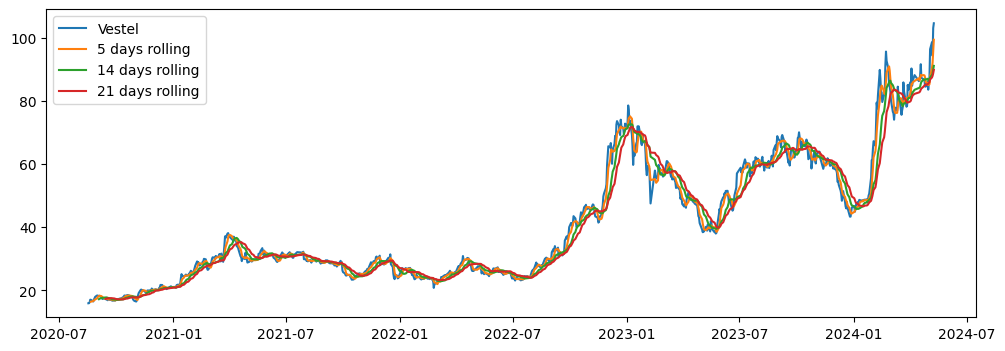

In [ ]:
##figsize=(20,10) parametresi, grafiğin genişliğini ve yüksekliğini belirler.
##Her ax.plot çağrısı, bir çizgi çizmek için gereken verileri ve çizginin etiketini içerir.
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(close_app.index, close_app, label='Vestel')
ax.plot(rolling_app5.index, rolling_app5, label='5 days rolling')
ax.plot(rolling_app14.index, rolling_app14, label='14 days rolling')
ax.plot(rolling_app21.index, rolling_app21, label='21 days rolling')
ax.legend(loc='upper left')

In [ ]:
MAs['Short']-MAs['Mid']

Date
2020-09-14   -0.408429
2020-09-15   -0.474000
2020-09-16   -0.465000
2020-09-17   -0.484572
2020-09-18   -0.427143
                ...   
2024-05-03    0.170715
2024-05-06    2.237858
2024-05-07    3.306429
2024-05-08    6.049286
2024-05-09    8.271428
Length: 915, dtype: float64

In [ ]:
np.array(MAs['Short']-MAs['Mid'])

In [ ]:
# Short ve Mid değerleri arasındaki tüm değerler içindeki en küçük %10. değeri
##Amaç uzaklıklar arasındaki optimum uzaklık
np.abs(np.percentile(np.array(MAs['Short']-MAs['Mid']),10))

2.0401716177804188

In [ ]:
def buy_sell_MA(data, opt = 50):
  buy_sell = []
  buy_signal = []
  sell_signal = []
  flag = 42

  up = data[(np.array(data['Short']-data['Mid'])>0) & (np.array(data['Short']-data['Long'])>0)]
  down = data[(np.array(data['Short']-data['Mid'])<0) & (np.array(data['Short']-data['Long'])<0)]

  ups = np.percentile(np.array(up['Short']-up['Mid']),opt)
  downs = np.percentile(np.array(down['Short']-down['Long']),opt)

  for i in range(0,len(data)):
    if (data['Short'][i] > data['Mid'][i]+ups) & (data['Short'][i] > data['Long'][i]+ups):
      buy_signal.append(np.nan)
      if flag != 1:
        sell_signal.append(data['Close'][i])
        buy_sell.append(data['Close'][i])
        flag = 1
      else:
        sell_signal.append(np.nan)
    elif (data['Short'][i] < data['Mid'][i]+downs ) & (data['Short'][i] < data['Long'][i]+downs):
      sell_signal.append(np.nan)
      if flag != 0:
        buy_signal.append(data['Close'][i])
        buy_sell.append(-data['Close'][i])
        flag = 0
      else :
        buy_signal.append(np.nan)
    else :
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
      buy_sell.append(np.nan)
    operations = np.array(buy_sell)
    operations = operations[~np.isnan(operations)]

    neg=0
    pos=0

    for i in range(len(operations)):
      if operations[i] <0:
        neg=i
        break
    for i in range(1,len(operations)):
      if operations[-i] > 0:
        pos = i-1
        break
    operations = operations[neg:-pos]
    PL = np.sum(operations)
  return (buy_signal,sell_signal,PL)

In [ ]:
MAs['BUY']=buy_sell_MA(MAs)[0]
MAs['SELL']=buy_sell_MA(MAs)[1]

<function matplotlib.pyplot.show(close=None, block=None)>

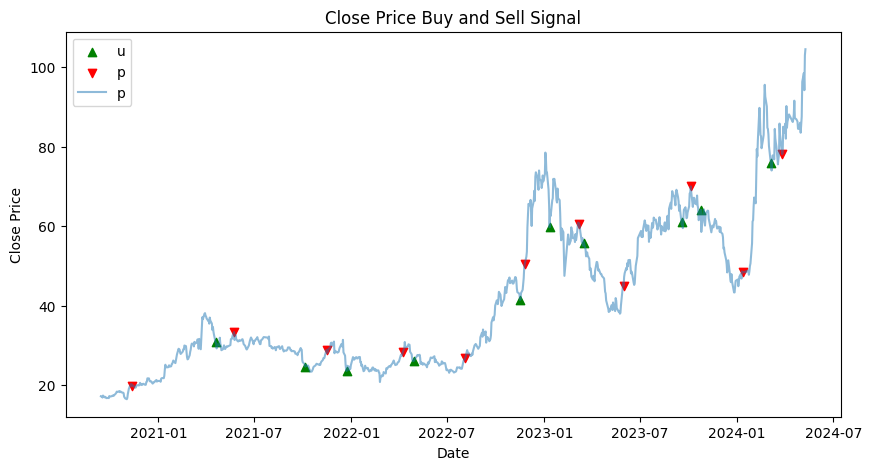

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(MAs.index, MAs['BUY'], color = 'green', label = 'BUY', marker = '^', alpha = 1)
plt.scatter(MAs.index, MAs['SELL'], color = 'red', label = 'SELL', marker = 'v', alpha = 1)
plt.plot(MAs['Close'], label = 'Close Price', alpha = 0.5)
plt.title('Close Price Buy and Sell Signal')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend('upper left')
plt.show

In [ ]:
##Optimizasyon işlemleri

In [ ]:
np.arange(10,91,5)

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90])

In [ ]:
opt = []
percentile = np.arange(10,91,5)
for i,j in enumerate(percentile):
  opt.append((percentile[i],buy_sell_MA(MAs,j)[2]))
opt = pd.DataFrame(opt)
opt.columns = ['Percentile','Performance']
opt = opt.sort_values(by='Performance',ascending=False)

In [ ]:
opt.head()

,Percentile,Performance
0,10,0.0
9,55,0.0
15,85,0.0
14,80,0.0
13,75,0.0


In [ ]:
opt['Percentile']

0     10
9     55
15    85
14    80
13    75
12    70
11    65
10    60
8     50
1     15
7     45
6     40
5     35
4     30
3     25
2     20
16    90
Name: Percentile, dtype: int64

In [ ]:
opt['Percentile'].values[0]

10

In [ ]:
MAs['BUY']= buy_sell_MA(MAs, opt['Percentile'].values[0])[0]
MAs['SELL']= buy_sell_MA(MAs, opt['Percentile'].values[0])[1]

In [ ]:
res_MA = buy_sell_MA(MAs, opt['Percentile'].values[0])[2]

In [ ]:
res_MA

0.0

<function matplotlib.pyplot.show(close=None, block=None)>

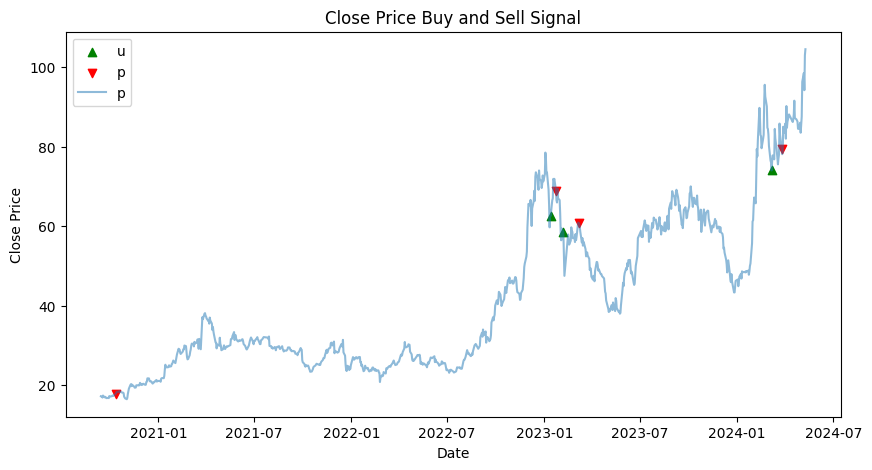

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(MAs.index, MAs['BUY'], color = 'green', label = 'BUY', marker = '^', alpha = 1)
plt.scatter(MAs.index, MAs['SELL'], color = 'red', label = 'SELL', marker = 'v', alpha = 1)
plt.plot(MAs['Close'], label = 'Close Price', alpha = 0.5)
plt.title('Close Price Buy and Sell Signal')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend('upper left')
plt.show

In [ ]:
##Bollinger Band

In [ ]:
MAs['Close'].rolling(window = 20).mean()

Date
2020-09-14        NaN
2020-09-15        NaN
2020-09-16        NaN
2020-09-17        NaN
2020-09-18        NaN
               ...   
2024-05-03    86.7950
2024-05-06    87.5475
2024-05-07    87.9675
2024-05-08    89.0175
2024-05-09    89.7325
Name: Close, Length: 915, dtype: float64

In [ ]:
BBs=pd.DataFrame()
BBs['Close']=MAs['Close']
BBs['SMA']=MAs['Close'].rolling(window = 20).mean()# 20 gözlemlik ortalama değerleri
BBs['STD']=MAs['Close'].rolling(window = 20).std() # 20 gözlemlik standart sapma değerleri
BBs['upper']=BBs['SMA']+BBs['STD']*2 #Ortalamadan iki std sapma yukarı
BBs['lower']=BBs['SMA']-BBs['STD']*2 #Ortalamadan iki std sapma aşağı
## Amaç std sapmalar arası oluşturarak bir güven aralığı belirleme
BBs.dropna(axis=0, inplace = True)
BBs.head()

,Close,SMA,STD,upper,lower
Date,,,,,
2020-10-09,17.469999,17.1155,0.232367,17.580234,16.650766
2020-10-12,17.860001,17.1480,0.285631,17.719262,16.576737
2020-10-13,18.049999,17.1920,0.349776,17.891551,16.492448
2020-10-14,18.379999,17.2515,0.439201,18.129902,16.373098
2020-10-15,18.330000,17.3235,0.491713,18.306926,16.340074


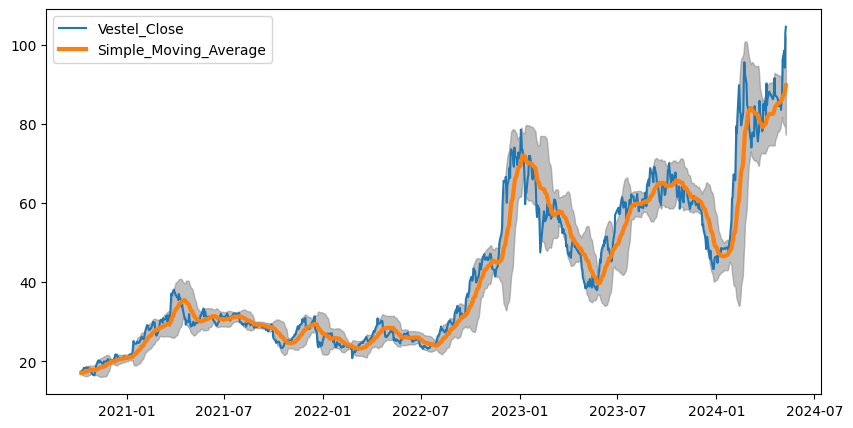

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
x_axis = BBs.index
ax.fill_between(x_axis, BBs['upper'], BBs['lower'], color = 'grey', alpha = 0.5)
ax.plot(x_axis,BBs['Close'],label = 'Vestel_Close')
ax.plot(x_axis,BBs['SMA'],label = 'Simple_Moving_Average',lw = 3)
ax.legend()

In [ ]:
def buy_sell_BB(data):
  buy_sell = []
  buy_signal = []
  sell_signal = []
  flag = 42

  for i in range(0,len(data)):
    if (data['Close'][i] > data['upper'][i]):
      buy_signal.append(np.nan)
      if flag != 1 :
        sell_signal.append(data['Close'][i])
        buy_sell.append(data['Close'][i])
        flag = 1
      else:
        sell_signal.append(np.nan)
    elif (data['Close'][i] < data['lower'][i]):
        sell_signal.append(np.nan)
        if flag != 0 :
          buy_signal.append(data['Close'][i])
          buy_sell.append(-data['Close'][i])
          flag = 0
        else:
          buy_signal.append(np.nan)
    else:
      buy_sell.append(np.nan)
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

    operations = np.array(buy_sell)
    operations = operations[~np.isnan(operations)]

    neg=0
    pos=0

    for i in range(len(operations)):
      if operations[i] <0:
        neg=i
        break
    for i in range(1,len(operations)):
      if operations[-i] > 0:
        pos = i-1
        break
    operations = operations[neg:-pos]
    PL = np.sum(operations)
  return (buy_signal,sell_signal,PL)



In [ ]:
BBs['BUY']=buy_sell_BB(BBs)[0]
BBs['SELL']=buy_sell_BB(BBs)[1]

In [ ]:
res_BB = buy_sell_BB(BBs)[2]

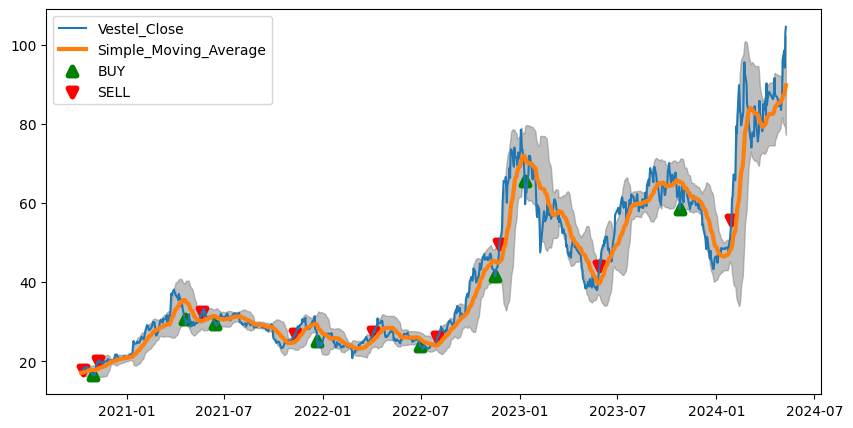

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
x_axis = BBs.index

ax.fill_between(x_axis, BBs['upper'], BBs['lower'], color = 'grey', alpha = 0.5)
ax.plot(x_axis,BBs['Close'],label = 'Vestel_Close')
ax.plot(x_axis,BBs['SMA'],label = 'Simple_Moving_Average',lw = 3)
ax.scatter(x_axis, BBs['BUY'],color = 'green',lw=4,label='BUY',marker='^')
ax.scatter(x_axis, BBs['SELL'],color = 'red',lw=4,label='SELL',marker='v')
ax.legend()

In [ ]:
decisions = pd.merge(BBs[['BUY','SELL']],MAs[['BUY','SELL']],left_index=True, right_index=True)
decisions.columns = ['BUY_MA','SELL_MA','BUY_BB','SELL_BB']
decisions

,BUY_MA,SELL_MA,BUY_BB,SELL_BB
Date,,,,
2020-10-09,NaN,NaN,NaN,NaN
2020-10-12,NaN,17.860001,NaN,17.860001
2020-10-13,NaN,NaN,NaN,NaN
2020-10-14,NaN,NaN,NaN,NaN
2020-10-15,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-05-03,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN


In [ ]:
decisions.dropna(thresh=2,axis=0)

,BUY_MA,SELL_MA,BUY_BB,SELL_BB
Date,,,,
2020-10-12,NaN,17.860001,NaN,17.860001


In [ ]:
decisions.dropna(thresh=1,axis=0)

,BUY_MA,SELL_MA,BUY_BB,SELL_BB
Date,,,,
2020-10-12,NaN,17.860001,NaN,17.860001
2020-10-30,16.680000,NaN,NaN,NaN
2020-11-09,NaN,20.080000,NaN,NaN
2021-04-19,30.760000,NaN,NaN,NaN
2021-05-21,NaN,32.380001,NaN,NaN
2021-06-15,29.520000,NaN,NaN,NaN
2021-11-09,NaN,26.799999,NaN,NaN
2021-12-21,25.200001,NaN,NaN,NaN
2022-04-04,NaN,27.360001,NaN,NaN


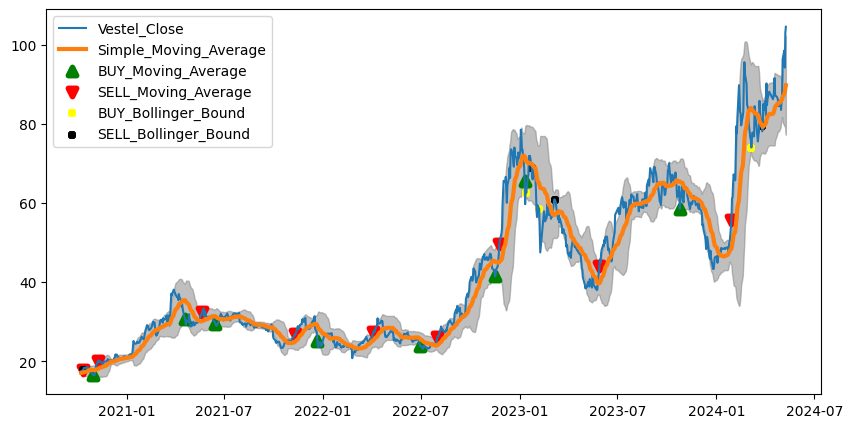

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
x_axis = BBs.index

ax.fill_between(x_axis, BBs['upper'], BBs['lower'], color = 'grey', alpha = 0.5)
ax.plot(x_axis,BBs['Close'],label = 'Vestel_Close')
ax.plot(x_axis,BBs['SMA'],label = 'Simple_Moving_Average',lw = 3)
ax.scatter(x_axis, decisions['BUY_MA'],color = 'green',lw=4,label='BUY_Moving_Average',marker='^')
ax.scatter(x_axis, decisions['SELL_MA'],color = 'red',lw=4,label='SELL_Moving_Average',marker='v')
ax.scatter(x_axis, decisions['BUY_BB'],color = 'yellow',lw=4,label='BUY_Bollinger_Bound',marker='+')
ax.scatter(x_axis, decisions['SELL_BB'],color = 'black',lw=4,label='SELL_Bollinger_Bound',marker='+')

ax.legend()

In [ ]:
##MACD

In [ ]:
#span : ağırlıklandırma şiddeti
MDs = pd.DataFrame()
MDs['Close']=MAs['Close']
MDs['Short'] = MDs['Close'].ewm(span=12, adjust = False).mean() # a = 2/(span+1)
MDs['Long'] = MDs['Close'].ewm(span=26, adjust = False).mean()
MDs['MACD'] = MDs['Short'] - MDs['Long']
MDs['signal'] = MDs['MACD'].ewm(span = 9, adjust = False).mean() #MACD değerlerinin 9 günlük ağırlıklandırılmış hareketli ortalaması

In [ ]:
MDs.head()

,Close,Short,Long,MACD,signal
Date,,,,,
2020-09-14,17.209999,17.209999,17.209999,0.000000,0.000000
2020-09-15,17.170000,17.203845,17.207036,-0.003191,-0.000638
2020-09-16,17.190001,17.201715,17.205774,-0.004059,-0.001322
2020-09-17,16.889999,17.153759,17.182384,-0.028624,-0.006783
2020-09-18,17.389999,17.190104,17.197763,-0.007659,-0.006958


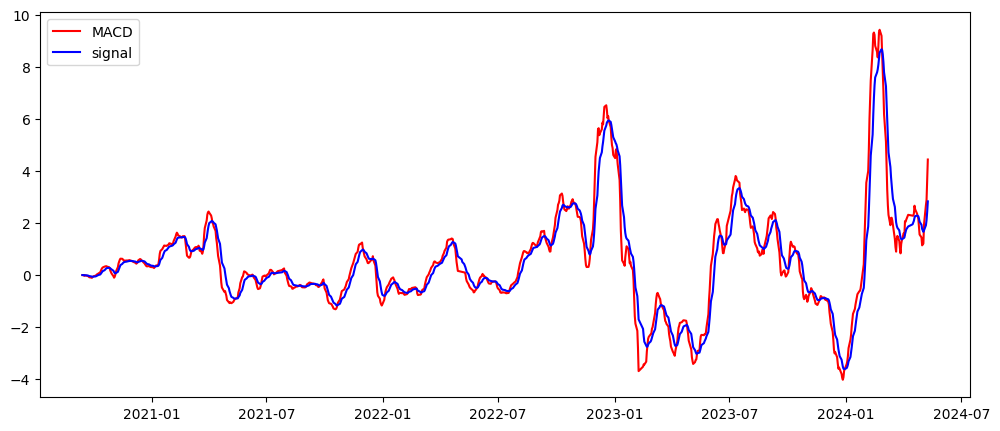

In [ ]:
# Kırmızı/mavi kesişimi al - sat tavsiyesi
plt.figure(figsize=(12,5))
plt.plot(MDs.index, MDs.MACD, color = 'red',label = 'MACD')
plt.plot(MDs.index, MDs.signal, color = 'blue', label = 'signal')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Kırmızı mavinin altında : BUY
# Kırmızı mavinin üstünde : SELL

In [ ]:
def buy_sell_MD(data, opt = 50):
  buy_sell = []
  buy_signal = []
  sell_signal = []
  flag = 42

  up = data[(np.array(data['MACD'] - data['signal'])>0)]
  down = data[(np.array(data['MACD'] - data['signal'])<0)]

  ups = np.percentile(np.array(up['MACD'] - up['signal']),opt)
  downs = np.percentile(np.array(down['MACD'] - down['signal']),opt)

  for i in range(0,len(data)):
    if (data['MACD'][i] > data['signal'][i] + ups):
      buy_signal.append(np.nan)
      if flag != 1 :
        sell_signal.append(data['Close'][i])
        buy_sell.append(data['Close'][i])
        flag = 1
      else:
        sell_signal.append(np.nan)
    elif (data['MACD'][i] < data['signal'][i] + downs):
        sell_signal.append(np.nan)
        if flag != 0 :
          buy_signal.append(data['Close'][i])
          buy_sell.append(-data['Close'][i])
          flag = 0
        else:
          buy_signal.append(np.nan)
    else:
      buy_sell.append(np.nan)
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

    operations = np.array(buy_sell)
    operations = operations[~np.isnan(operations)]
    neg=0
    pos=0

    for i in range(len(operations)):
      if operations[i] <0:
        neg=i
        break
    for i in range(1,len(operations)):
      if operations[-i] > 0:
        pos = i-1
        break
    operations = operations[neg:-pos]
    PL = np.sum(operations)
  return (buy_signal,sell_signal,PL)



In [ ]:
MDs['BUY']=buy_sell_MD(MDs)[0]
MDs['SELL']=buy_sell_MD(MDs)[1]

In [ ]:
#Optimizasyon işlemi
percentile = np.arange(10,91,5)
percentile

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90])

In [ ]:
opt = []
percentile = np.arange(10,91,5)
for i,j in enumerate(percentile):
  opt.append((percentile[i],buy_sell_MD(MDs, j)[2]))
opt = pd.DataFrame(opt)
opt.columns = ['Percentile','Performance']
opt = opt.sort_values(by = 'Performance', ascending=False)
opt.head()

,Percentile,Performance
0,10,0.0
9,55,0.0
15,85,0.0
14,80,0.0
13,75,0.0


In [ ]:
opt['Percentile'].values[0] # En iyi performans veren percentile

10

In [ ]:
MDs['BUY'] = buy_sell_MD(MDs, opt['Percentile'].values[0])[0]
MDs['SELL'] = buy_sell_MD(MDs, opt['Percentile'].values[0])[1]

In [ ]:
buy_sell_MD(MDs, opt['Percentile'].values[0])[2] # Percentile en iyi olanın performansı

0.0

In [ ]:
res_MD = buy_sell_MD(MDs, opt['Percentile'].values[0])[2]

In [ ]:
# Amaç; karar mekanizmasında kesişen kolonlarda güçlü al/sat tavsiyesinin hesaplamak
decisions = pd.merge(BBs[['BUY','SELL']],MAs[['BUY','SELL']],left_index=True, right_index=True)
decisions = pd.merge(decisions, MDs[['BUY','SELL']],left_index=True, right_index=True)
decisions.columns = ['BUY_MA','SELL_MA','BUY_BB','SELL_BB','BUY_MACD','SELL_MACD']
decisions

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD
Date,,,,,,
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-12,NaN,17.860001,NaN,17.860001,NaN,NaN
2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-14,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#thresh:kesişim kaç kolonda olsun
decisions.dropna(thresh=2,axis = 0).head() # Hem moving average hem MACD indikatörü için al tavsiyesi

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD
Date,,,,,,
2020-10-12,NaN,17.860001,NaN,17.860001,NaN,NaN
2021-04-19,30.760000,NaN,NaN,NaN,30.760000,NaN
2022-11-16,41.439999,NaN,NaN,NaN,41.439999,NaN
2022-11-24,NaN,49.720001,NaN,NaN,NaN,49.720001


In [ ]:
decisions.dropna(thresh=1,axis = 0).head()

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD
Date,,,,,,
2020-10-12,NaN,17.860001,NaN,17.860001,NaN,NaN
2020-10-30,16.68,NaN,NaN,NaN,NaN,NaN
2020-11-09,NaN,20.080000,NaN,NaN,NaN,NaN
2021-04-19,30.76,NaN,NaN,NaN,30.76,NaN
2021-05-17,NaN,NaN,NaN,NaN,NaN,30.08


In [ ]:
##RSI

In [ ]:
RSs = pd.DataFrame()
RSs['Close'] = MAs['Close']
RSs['Diff'] = RSs['Close'].diff(1)

In [ ]:
RSs['Gain']=RSs['Diff'].mask(RSs['Diff']<0,0)
RSs['Loss']=RSs['Diff'].mask(RSs['Diff']>0,0)
# mask fonksiyonu yardımıyla neg ve pos olanlar ayrıldı
#Diff - ise gain 0
#Diff + ise loss 0

In [ ]:
RSs.head(10)

,Close,Diff,Gain,Loss
Date,,,,
2020-09-14,17.209999,NaN,NaN,NaN
2020-09-15,17.170000,-0.039999,0.000000,-0.039999
2020-09-16,17.190001,0.020000,0.020000,0.000000
2020-09-17,16.889999,-0.300001,0.000000,-0.300001
2020-09-18,17.389999,0.500000,0.500000,0.000000
2020-09-21,16.940001,-0.449999,0.000000,-0.449999
2020-09-22,17.070000,0.129999,0.129999,0.000000
2020-09-23,17.000000,-0.070000,0.000000,-0.070000
2020-09-24,16.780001,-0.219999,0.000000,-0.219999


In [ ]:
RSs['Avg_Gain']=RSs['Gain'].rolling(window=14).mean()
RSs['Avg_Loss']=RSs['Loss'].rolling(window=14).mean()

In [ ]:
RSs.head(20)

,Close,Diff,Gain,Loss,Avg_Gain,Avg_Loss
Date,,,,,,
2020-09-14,17.209999,NaN,NaN,NaN,NaN,NaN
2020-09-15,17.170000,-0.039999,0.000000,-0.039999,NaN,NaN
2020-09-16,17.190001,0.020000,0.020000,0.000000,NaN,NaN
2020-09-17,16.889999,-0.300001,0.000000,-0.300001,NaN,NaN
2020-09-18,17.389999,0.500000,0.500000,0.000000,NaN,NaN
2020-09-21,16.940001,-0.449999,0.000000,-0.449999,NaN,NaN
2020-09-22,17.070000,0.129999,0.129999,0.000000,NaN,NaN
2020-09-23,17.000000,-0.070000,0.000000,-0.070000,NaN,NaN
2020-09-24,16.780001,-0.219999,0.000000,-0.219999,NaN,NaN


In [ ]:
rs=abs(RSs['Avg_Gain']/RSs['Avg_Loss'])
RSs['RSI']=100-(100/(1+rs)) # RSI fonksiyonu
# RSI fonksiyonu 0-100 arasında bir değer alır

In [ ]:
RSs.head(20)

,Close,Diff,Gain,Loss,Avg_Gain,Avg_Loss,RSI
Date,,,,,,,
2020-09-14,17.209999,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-15,17.170000,-0.039999,0.000000,-0.039999,NaN,NaN,NaN
2020-09-16,17.190001,0.020000,0.020000,0.000000,NaN,NaN,NaN
2020-09-17,16.889999,-0.300001,0.000000,-0.300001,NaN,NaN,NaN
2020-09-18,17.389999,0.500000,0.500000,0.000000,NaN,NaN,NaN
2020-09-21,16.940001,-0.449999,0.000000,-0.449999,NaN,NaN,NaN
2020-09-22,17.070000,0.129999,0.129999,0.000000,NaN,NaN,NaN
2020-09-23,17.000000,-0.070000,0.000000,-0.070000,NaN,NaN,NaN
2020-09-24,16.780001,-0.219999,0.000000,-0.219999,NaN,NaN,NaN


In [ ]:
##High ve low değerlerine göre RSI sonuçlarının aşıp aşmadığı durumlara bakarak al/sat belirlenir
def buy_sell_RS(data, opt_low=30, opt_high=70):
  buy_sell = []
  buy_signal = []
  sell_signal = []
  flag = 42

  for i in range(0,len(data)):
    if (data['RSI'][i]>opt_high):
      buy_signal.append(np.nan)
      if flag != 1 :
        sell_signal.append(data['Close'][i])
        buy_sell.append(data['Close'][i])
        flag = 1
      else:
        sell_signal.append(np.nan)
    elif (data['RSI'][i] < opt_low):
        sell_signal.append(np.nan)
        if flag != 0 :
          buy_signal.append(data['Close'][i])
          buy_sell.append(-data['Close'][i])
          flag = 0
        else:
          buy_signal.append(np.nan)
    else:
      buy_sell.append(np.nan)
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

    operations = np.array(buy_sell)
    operations = operations[~np.isnan(operations)]
    neg=0
    pos=0

    for i in range(len(operations)):
      if operations[i] <0:
        neg=i
        break
    for i in range(1,len(operations)):
      if operations[-i] > 0:
        pos = i-1
        break
    operations = operations[neg:-pos]
    PL = np.sum(operations)
  return (buy_signal,sell_signal,PL)


In [ ]:
RSs['BUY']=buy_sell_RS(RSs)[0]
RSs['SELL']=buy_sell_RS(RSs)[1]

In [ ]:
opt = []
percentile = np.arange(0,100,1)
for i,j in enumerate(percentile):
  if j<50:
    opt.append((percentile[i],percentile[-(i+1)], buy_sell_RS(RSs, opt_low = percentile[i], opt_high = percentile[-(i+1)])[2])) #Low_value 1den high_value 99dan başlasın
opt = pd.DataFrame(opt)
opt.columns = ['Low_Value','High_Value','Performance']
opt = opt.sort_values(by = 'Performance', ascending=False)
opt.head()

,Low_Value,High_Value,Performance
0,0,99,0.0
37,37,62,0.0
27,27,72,0.0
28,28,71,0.0
29,29,70,0.0


In [ ]:
RSs['BUY'] = buy_sell_RS(RSs, opt_low = opt['Low_Value'].values[0], opt_high = opt['High_Value'].values[0])[0]
RSs['SELL'] = buy_sell_RS(RSs, opt_low = opt['Low_Value'].values[0], opt_high = opt['High_Value'].values[0])[1]

In [ ]:
buy_sell_RS(RSs, opt_low = opt['Low_Value'].values[0], opt_high = opt['High_Value'].values[0])[2]

18.90000343322754

In [ ]:
res_RS = buy_sell_RS(RSs, opt_low = opt['Low_Value'].values[0], opt_high = opt['High_Value'].values[0])[2]

In [ ]:
RSs.head(5)

,Close,Diff,Gain,Loss,Avg_Gain,Avg_Loss,RSI,BUY,SELL
Date,,,,,,,,,
2020-09-08,17.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-09,17.270000,-0.209999,0.000000,-0.209999,NaN,NaN,NaN,NaN,NaN
2020-09-10,17.370001,0.100000,0.100000,0.000000,NaN,NaN,NaN,NaN,NaN
2020-09-11,17.459999,0.089998,0.089998,0.000000,NaN,NaN,NaN,NaN,NaN
2020-09-14,17.209999,-0.250000,0.000000,-0.250000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Amaç; karar mekanizmasında kesişen kolonlarda güçlü al/sat tavsiyesinin hesaplamak
decisions = pd.merge(BBs[['BUY','SELL']],MAs[['BUY','SELL']],left_index=True, right_index=True)
decisions = pd.merge(decisions, MDs[['BUY','SELL']],left_index=True, right_index=True)
decisions = pd.merge(decisions, RSs[['BUY','SELL']],left_index=True, right_index=True,suffixes=('_MA', '_RSI'))
decisions.columns = ['BUY_MA','SELL_MA','BUY_BB','SELL_BB','BUY_MACD','SELL_MACD','BUY_RSI','SELL_RSI']
decisions.dropna(thresh=2,axis=0)

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD,BUY_RSI,SELL_RSI
Date,,,,,,,,
2020-10-12,NaN,17.860001,NaN,17.860001,NaN,NaN,NaN,NaN
2021-04-19,30.760000,NaN,NaN,NaN,30.760000,NaN,NaN,NaN
2022-11-16,41.439999,NaN,NaN,NaN,41.439999,NaN,NaN,NaN
2022-11-24,NaN,49.720001,NaN,NaN,NaN,49.720001,NaN,NaN


In [ ]:
##VWMA(Volume Weighted Moving Average) : Hisse senedindeki hacim değişiklikleri ile hacim ağırlıklandırması

In [ ]:
VWs = pd.DataFrame()
VWs['Close']=vest_df['Close']
VWs['Volume']=vest_df['Volume']
VWs['C*V'] = VWs['Close'] * VWs['Volume']

In [ ]:
VWs.head(5)

,Close,Volume,C*V
Date,,,
2017-01-02,6.43,5979165,3.844603e+07
2017-01-03,6.31,9667099,6.099939e+07
2017-01-04,6.18,6555520,4.051311e+07
2017-01-05,6.17,4716446,2.910047e+07
2017-01-06,6.21,3835989,2.382149e+07


In [ ]:
VWs['VW14']=VWs['C*V'].rolling(window=14).sum() / VWs['Volume'].rolling(window=14).sum()
VWs['VW21']=VWs['C*V'].rolling(window=21).sum() / VWs['Volume'].rolling(window=21).sum()
VWs['VW50']=VWs['C*V'].rolling(window=50).sum() / VWs['Volume'].rolling(window=50).sum()

In [ ]:
VWs.head(50)

,Close,Volume,C*V,VW14,VW21,VW50
Date,,,,,,
2017-01-02,6.43,5979165,3.844603e+07,NaN,NaN,NaN
2017-01-03,6.31,9667099,6.099939e+07,NaN,NaN,NaN
2017-01-04,6.18,6555520,4.051311e+07,NaN,NaN,NaN
2017-01-05,6.17,4716446,2.910047e+07,NaN,NaN,NaN
2017-01-06,6.21,3835989,2.382149e+07,NaN,NaN,NaN
2017-01-09,6.18,3259709,2.014500e+07,NaN,NaN,NaN
2017-01-10,6.28,9968142,6.259993e+07,NaN,NaN,NaN
2017-01-11,6.28,6613489,4.153271e+07,NaN,NaN,NaN
2017-01-12,6.45,17554994,1.132297e+08,NaN,NaN,NaN


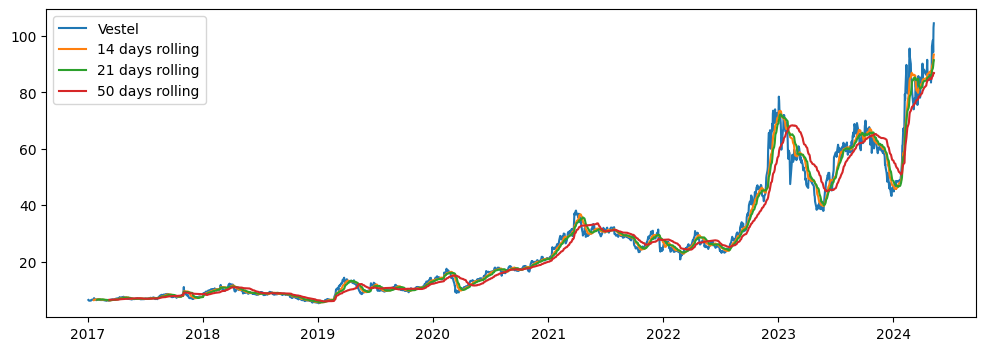

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(VWs.index, VWs['Close'], label='Vestel')
ax.plot(VWs['VW14'].index, VWs['VW14'], label='14 days rolling')
ax.plot(VWs['VW21'].index, VWs['VW21'], label='21 days rolling')
ax.plot(VWs['VW50'].index, VWs['VW50'], label='50 days rolling')
ax.legend(loc='upper left')

In [ ]:
def buy_sell_VW(data, opt = 50):
  buy_sell = []
  buy_signal = []
  sell_signal = []
  flag = 42

  up = data[(np.array(data['VW14'] - data['VW21'])>0) & (np.array(data['VW14'] - data['VW50'])>0)]
  down = data[(np.array(data['VW14'] - data['VW21'])<0) & (np.array(data['VW14'] - data['VW50'])<0)]

  ups = np.percentile(np.array(up['VW14'] - up['VW21']),opt)
  downs = np.percentile(np.array(down['VW14'] - down['VW50']),opt)

  for i in range(0,len(data)):
    if (data['VW14'][i] > data['VW21'][i] + ups) & (data['VW14'][i] > data['VW50'][i] + ups) :
      buy_signal.append(np.nan)
      if flag != 1 :
        sell_signal.append(data['Close'][i])
        buy_sell.append(data['Close'][i])
        flag = 1
      else:
        sell_signal.append(np.nan)
    elif (data['VW14'][i] < data['VW21'][i] + downs) & (data['VW14'][i] < data['VW50'][i] + downs):
        sell_signal.append(np.nan)
        if flag != 0 :
          buy_signal.append(data['Close'][i])
          buy_sell.append(-data['Close'][i])
          flag = 0
        else:
          buy_signal.append(np.nan)
    else:
      buy_sell.append(np.nan)
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

    operations = np.array(buy_sell)
    operations = operations[~np.isnan(operations)]
    neg=0
    pos=0

    for i in range(len(operations)):
      if operations[i] <0:
        neg=i
        break
    for i in range(1,len(operations)):
      if operations[-i] > 0:
        pos = i-1
        break
    operations = operations[neg:-pos]
    PL = np.sum(operations)
  return (buy_signal,sell_signal,PL)

In [ ]:
VWs['BUY']=buy_sell_VW(VWs)[0]
VWs['SELL']=buy_sell_VW(VWs)[1]

In [ ]:
buy_sell_VW(VWs)[2]

0.0

In [ ]:
res_VW = buy_sell_VW(VWs)[2]

In [ ]:
decisions = pd.merge(BBs[['BUY','SELL']],MAs[['BUY','SELL']],left_index=True, right_index=True)
decisions = pd.merge(decisions, MDs[['BUY','SELL']],left_index=True, right_index=True)
decisions = pd.merge(decisions, RSs[['BUY','SELL']],left_index=True, right_index=True,suffixes=('_MA', '_RSI'))
decisions = pd.merge(decisions, VWs[['BUY','SELL']],left_index=True, right_index=True)
decisions.columns = ['BUY_MA','SELL_MA','BUY_BB','SELL_BB','BUY_MACD','SELL_MACD','BUY_RSI','SELL_RSI','BUY_VW','SELL_VW']
decisions.dropna(thresh=1,axis=0)

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD,BUY_RSI,SELL_RSI,BUY_VW,SELL_VW
Date,,,,,,,,,,
2020-10-12,NaN,17.860001,NaN,17.860001,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-30,16.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-09,NaN,20.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-19,30.760000,NaN,NaN,NaN,30.760000,NaN,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.799999,NaN
2021-05-17,NaN,NaN,NaN,NaN,NaN,30.080000,NaN,NaN,NaN,NaN
2021-05-21,NaN,32.380001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-15,29.520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.340000


In [ ]:
result = {'Moving Average': res_MA,
          'Bollinger Bounds': res_BB,
          'MACD': res_MD,
          'RSI': res_RS,
          'Volume Weighted Moving Average':res_VW}


In [ ]:
result

{'Moving Average': 41.819997787475586,
 'Bollinger Bounds': 0.0,
 'MACD': 33.31000518798828,
 'RSI': 18.90000343322754,
 'Volume Weighted Moving Average': 0.0}

In [ ]:
indics = decisions.dropna(thresh=1,axis=0)

In [ ]:
indics

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD,BUY_RSI,SELL_RSI,BUY_VW,SELL_VW
Date,,,,,,,,,,
2020-10-12,NaN,17.860001,NaN,17.860001,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-30,16.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-09,NaN,20.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-19,30.760000,NaN,NaN,NaN,30.760000,NaN,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.799999,NaN
2021-05-17,NaN,NaN,NaN,NaN,NaN,30.080000,NaN,NaN,NaN,NaN
2021-05-21,NaN,32.380001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-15,29.520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.340000


In [ ]:
indics.reset_index(inplace=True)

In [ ]:
indics

,Date,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD,BUY_RSI,SELL_RSI,BUY_VW,SELL_VW
0,2020-10-12,NaN,17.860001,NaN,17.860001,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-30,16.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-09,NaN,20.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-19,30.760000,NaN,NaN,NaN,30.760000,NaN,NaN,NaN,NaN,NaN
4,2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.799999,NaN
5,2021-05-17,NaN,NaN,NaN,NaN,NaN,30.080000,NaN,NaN,NaN,NaN
6,2021-05-21,NaN,32.380001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-06-15,29.520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.340000
9,2021-11-09,NaN,26.799999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
indics = pd.melt(indics,id_vars=['Date'],var_name = 'Metrics', value_name='Values').dropna(axis=0).sort_values(['Date','Values'])

In [ ]:
indics

,Date,Metrics,Values
40,2020-10-12,SELL_MA,17.860001
120,2020-10-12,SELL_BB,17.860001
1,2020-10-30,BUY_MA,16.680000
42,2020-11-09,SELL_MA,20.080000
3,2021-04-19,BUY_MA,30.760000
163,2021-04-19,BUY_MACD,30.760000
324,2021-04-30,BUY_VW,28.799999
205,2021-05-17,SELL_MACD,30.080000
46,2021-05-21,SELL_MA,32.380001
7,2021-06-15,BUY_MA,29.520000
